In [5]:
import pandas as pd
import numpy as np
# Plot a scatter plot chart
%matplotlib inline
from matplotlib import pyplot as plt

In [6]:
ex1data1=pd.read_csv("ex1data1.csv",usecols=["pop","profit"])
ex1data1.head()

,pop,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [7]:
ex1data1.describe()

,pop,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [8]:
m=ex1data1["pop"].count()     #numberOfTrainingExamples

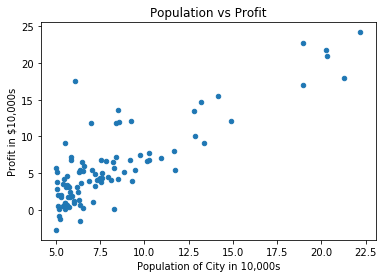

In [9]:
ex1data1.plot(kind='scatter', title='Population vs Profit', x='pop', y='profit')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

In [73]:
X=ex1data1.iloc[:,0]
Y=ex1data1.iloc[:,1]
X = X[:,np.newaxis]      #To convert rank 1 to rank 2 array we use someArray[:,np.newaxis]. for more details https://medium.com/analytics-vidhya/python-implementation-of-andrew-ngs-machine-learning-course-part-1-6b8dd1c73d80
Y = Y[:,np.newaxis]
theta = np.zeros([2,1])
iterations = 1500
alpha = 0.01
ones = np.ones((m,1))
X = np.hstack((ones, X)) # adding the intercept term
print(theta)

[[0.]
 [0.]]


In [74]:
def computeCost(X,Y,theta,m):
    """
    Take in a numpy array X,Y, theta and generate the cost function     of using theta as parameter in a linear regression model
    """
    temp=((np.dot(X,theta))-Y)**2
    return ((np.sum(temp))/(2*m))
computeCost(X,Y,theta,m)

32.072733877455676

In [75]:
def derivative(X,Y,theta,mulitplier,m):
    temp=((np.dot(X,theta))-Y)
    temp=temp*X[mulitplier]
    temp=(np.sum(temp))
    temp=temp/m
    return temp

In [79]:
def gradientDescent(X, Y, theta, alpha, iterations, m):
    for i in range(iterations):
        cost=computeCost(X,Y,theta,m)
        debugIter.append(i)
        debugCost.append(cost)
        temp = np.dot(X, theta) - Y
        temp = np.dot(X.T, temp)    #so whats happening here is in temp 0 row stores for thetaO w.r.t derivative and 1th row w.r.t to theta 1 derivative
        theta = theta - (alpha/m) * temp
    return theta
print(theta)
debugIter=list()
debugCost=list()
theta=gradientDescent(X, Y, theta, alpha, iterations,m)
computeCost(X,Y,theta,m)

[[-3.63029144]
 [ 1.16636235]]


4.47699999352146

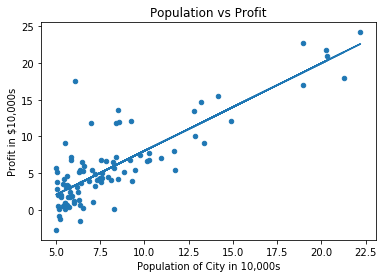

In [80]:
ex1data1.plot(kind='scatter', title='Population vs Profit', x='pop', y='profit')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(X[:,1], np.dot(X, theta))
plt.show()




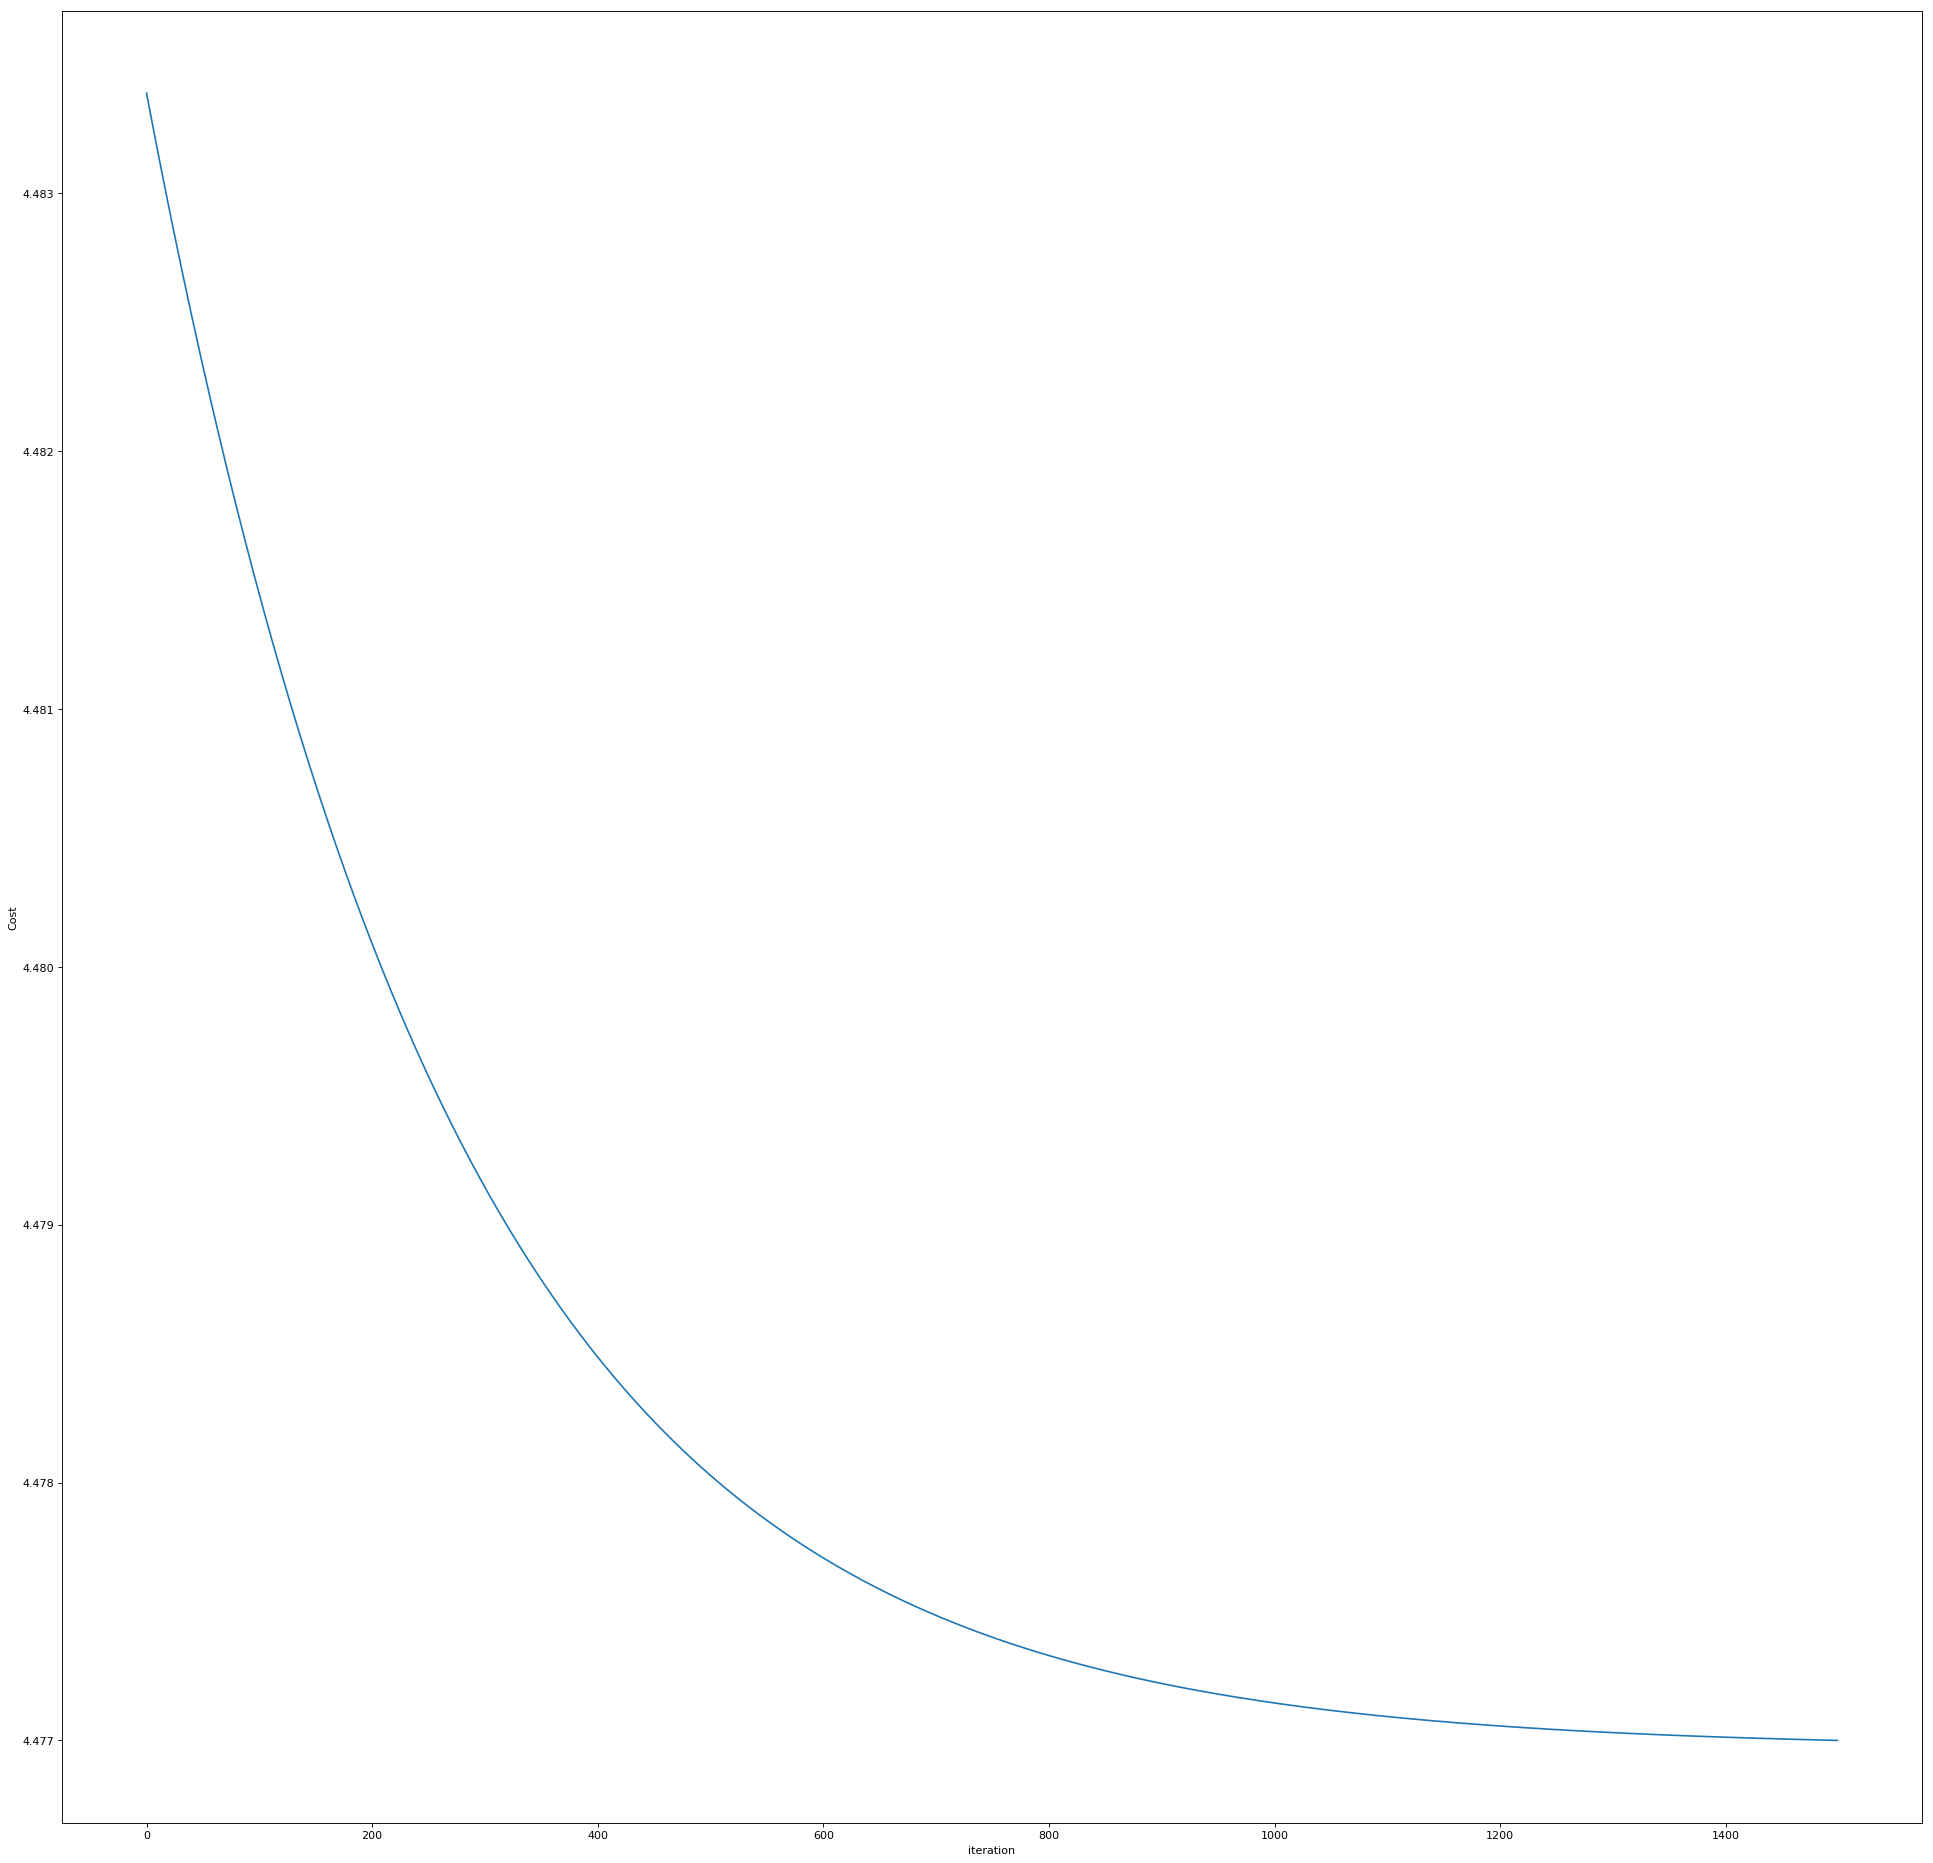

In [81]:
from matplotlib.pyplot import figure
figure( figsize=(30, 30), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('iteration')
plt.ylabel('Cost')
plt.plot(debugIter,debugCost)
plt.show()